In [1]:
#!pip install google-api-python-client

In [21]:
import pandas as pd
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError

In [22]:
cred=pd.read_csv('ytb_key.csv')

In [23]:
cred=cred['API_KEY'].values[0]

In [24]:
API_KEY=cred

In [6]:
def get_trending_videos(api_key, max_results=200):
    try:
        # Build the YouTube service
        youtube = build('youtube', 'v3', developerKey=api_key)

        # Initialize the list to hold video details
        videos = []

        # Fetch the most popular videos
        request = youtube.videos().list(
            part='snippet,contentDetails,statistics',
            chart='mostPopular',
            regionCode='IN',  
            maxResults=50
        )

        # Paginate through the results if max_results > 50
        while request and len(videos) < max_results:
            response = request.execute()
            for item in response['items']:
                video_details = {
                    'video_id': item['id'],
                    'title': item['snippet']['title'],
                    'description': item['snippet']['description'],
                    'published_at': item['snippet']['publishedAt'],
                    'channel_id': item['snippet']['channelId'],
                    'channel_title': item['snippet']['channelTitle'],
                    'category_id': item['snippet']['categoryId'],
                    'tags': item['snippet'].get('tags', []),
                    'duration': item['contentDetails']['duration'],
                    'definition': item['contentDetails']['definition'],
                    'caption': item['contentDetails'].get('caption', 'false'),
                    'view_count': item['statistics'].get('viewCount', 0),
                    'like_count': item['statistics'].get('likeCount', 0),
                    'dislike_count': item['statistics'].get('dislikeCount', 0),
                    'favorite_count': item['statistics'].get('favoriteCount', 0),
                    'comment_count': item['statistics'].get('commentCount', 0)
                }
                videos.append(video_details)

            # Get the next page token
            request = youtube.videos().list_next(request, response)

        return videos[:max_results]
    
    except HttpError as e:
        print(f'An HTTP error {e.resp.status} occurred: {e.content}')
        return []

In [7]:
def save_to_csv(data, filename):
    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)
    return df

In [8]:
def main():
    trending_videos = get_trending_videos(API_KEY)
    if trending_videos:  # Check if any data was returned
        filename = 'trending_videos.csv'
        df=save_to_csv(trending_videos, filename)
        print(df)
        print(f'Trending videos saved to {filename}')
    else:
        print('No data to save.')

In [9]:
if __name__ == '__main__':
    main()

        video_id                                              title  \
0    77vRyWNqZjM  Chhaava | Official Trailer | Vicky K | Rashmik...   
1    _wfrNbLguWw  LOCK  (MUSIC VIDEO) SIDHU MOOSE WALA  | THE KI...   
2    miZ0vI1lSZw  @FlyingBeast320 brings Beast Life to Shark Tan...   
3    N6cCkpo04Cg               FREE FIRE COMEBACK? WE NEED TO TALK!   
4    N-mZ4gtRJyI  Meem Se Mohabbat - Episode 12 [CC] 23rd Jan 20...   
..           ...                                                ...   
121  PIPhgIqqdkE       Love Marriage | the mridul | Pragati | Nitin   
122  3k_FSH1BQUc  🤣😂പരസ്പരം ട്രോള സുരാജ് വെഞ്ഞാറമൂടും ധ്യാൻ ശ്രീ...   
123  jhD9yJwPqA8  Shlok ने Astha के साथ क्या किया? | Iss Pyar Ko...   
124  S0SHop0GhWw  Ee Rathri Lyric Video | Dominic and The Ladies...   
125  Nrv44ZRPbW4  माँ बेटी का रुला देने वाला सीन...माँ तो माँ हो...   

                                           description          published_at  \
0    Dinesh Vijan and Maddock Films present the tra...  2025-01-22T

In [10]:
trending_videos = pd.read_csv('trending_videos.csv')
print(trending_videos.head())

      video_id                                              title  \
0  77vRyWNqZjM  Chhaava | Official Trailer | Vicky K | Rashmik...   
1  _wfrNbLguWw  LOCK  (MUSIC VIDEO) SIDHU MOOSE WALA  | THE KI...   
2  miZ0vI1lSZw  @FlyingBeast320 brings Beast Life to Shark Tan...   
3  N6cCkpo04Cg               FREE FIRE COMEBACK? WE NEED TO TALK!   
4  N-mZ4gtRJyI  Meem Se Mohabbat - Episode 12 [CC] 23rd Jan 20...   

                                         description          published_at  \
0  Dinesh Vijan and Maddock Films present the tra...  2025-01-22T11:45:04Z   
1  Sidhu Moose Wala Presents \n\nSong - LOCK\nSin...  2025-01-23T03:45:31Z   
2  https://www.sonyliv.com/shows/shark-tank-india...  2025-01-24T15:01:06Z   
3  FREE FIRE COMEBACK? WE NEED TO TALK!\n\n😘NEW G...  2025-01-25T04:00:12Z   
4  👉 Subscribe To HUM TV - https://bit.ly/HumTvPK...  2025-01-23T16:00:31Z   

                 channel_id     channel_title  category_id  \
0  UC-LOdiPoxninevJ0DkleCLg     Maddock Films         

In [11]:
# check for missing values
missing_values = trending_videos.isnull().sum()

# display data types
data_types = trending_videos.dtypes

missing_values, data_types

(video_id          0
 title             0
 description       5
 published_at      0
 channel_id        0
 channel_title     0
 category_id       0
 tags              0
 duration          0
 definition        0
 caption           0
 view_count        0
 like_count        0
 dislike_count     0
 favorite_count    0
 comment_count     0
 dtype: int64,
 video_id          object
 title             object
 description       object
 published_at      object
 channel_id        object
 channel_title     object
 category_id        int64
 tags              object
 duration          object
 definition        object
 caption             bool
 view_count         int64
 like_count         int64
 dislike_count      int64
 favorite_count     int64
 comment_count      int64
 dtype: object)

In [12]:
# fill missing descriptions with "No description"
trending_videos['description'].fillna('No description', inplace=True)

C:\Users\ambik\AppData\Local\Temp\ipykernel_12376\612291233.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  trending_videos['description'].fillna('No description', inplace=True)


In [13]:
# convert `published_at` to datetime
trending_videos['published_at'] = pd.to_datetime(trending_videos['published_at'])

# convert tags from string representation of list to actual list
trending_videos['tags'] = trending_videos['tags'].apply(lambda x: eval(x) if isinstance(x, str) else x)

In [14]:
# descriptive statistics
descriptive_stats = trending_videos[['view_count', 'like_count', 'dislike_count', 'comment_count']].describe()

descriptive_stats

,view_count,like_count,dislike_count,comment_count
count,1.260000e+02,1.260000e+02,126.0,126.000000
mean,2.264230e+06,7.423647e+04,0.0,5473.476190
std,4.276267e+06,1.630186e+05,0.0,24718.676818
min,7.926200e+04,0.000000e+00,0.0,0.000000
25%,3.621135e+05,6.908000e+03,0.0,245.250000
50%,7.572090e+05,2.239450e+04,0.0,731.500000
75%,2.410199e+06,7.733750e+04,0.0,3228.500000
max,3.583806e+07,1.488177e+06,0.0,263563.000000


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


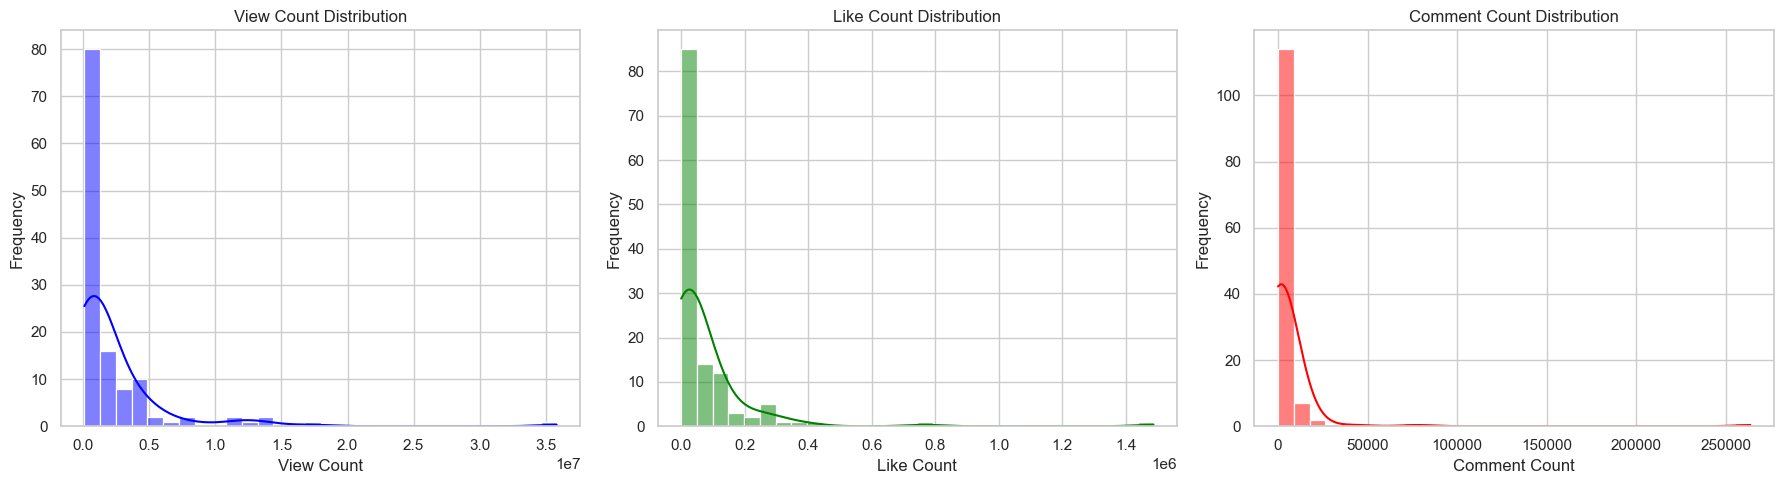

In [16]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# view count distribution
sns.histplot(trending_videos['view_count'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('View Count Distribution')
axes[0].set_xlabel('View Count')
axes[0].set_ylabel('Frequency')

# like count distribution
sns.histplot(trending_videos['like_count'], bins=30, kde=True, ax=axes[1], color='green')
axes[1].set_title('Like Count Distribution')
axes[1].set_xlabel('Like Count')
axes[1].set_ylabel('Frequency')

# comment count distribution
sns.histplot(trending_videos['comment_count'], bins=30, kde=True, ax=axes[2], color='red')
axes[2].set_title('Comment Count Distribution')
axes[2].set_xlabel('Comment Count')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

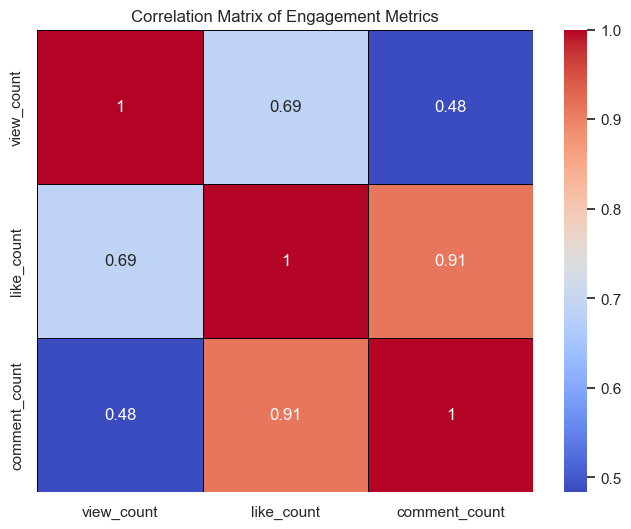

In [17]:
# Now, let’s have a look at the correlation between likes, views, and comments:
# correlation matrix
correlation_matrix = trending_videos[['view_count', 'like_count', 'comment_count']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix of Engagement Metrics')
plt.show()

In [26]:
# So, let’s collect the category names as well to analyze the categories of the trending videos:

from googleapiclient.discovery import build

API_KEY = API_KEY
youtube = build('youtube', 'v3', developerKey=API_KEY)

def get_category_mapping():
    request = youtube.videoCategories().list(
        part='snippet',
        regionCode='IN'
    )
    response = request.execute()
    category_mapping = {}
    for item in response['items']:
        category_id = int(item['id'])
        category_name = item['snippet']['title']
        category_mapping[category_id] = category_name
    return category_mapping

# get the category mapping
category_mapping = get_category_mapping()
print(category_mapping)

{1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music', 15: 'Pets & Animals', 17: 'Sports', 18: 'Short Movies', 19: 'Travel & Events', 20: 'Gaming', 21: 'Videoblogging', 22: 'People & Blogs', 23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style', 27: 'Education', 28: 'Science & Technology', 30: 'Movies', 31: 'Anime/Animation', 32: 'Action/Adventure', 33: 'Classics', 34: 'Comedy', 35: 'Documentary', 36: 'Drama', 37: 'Family', 38: 'Foreign', 39: 'Horror', 40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42: 'Shorts', 43: 'Shows', 44: 'Trailers'}


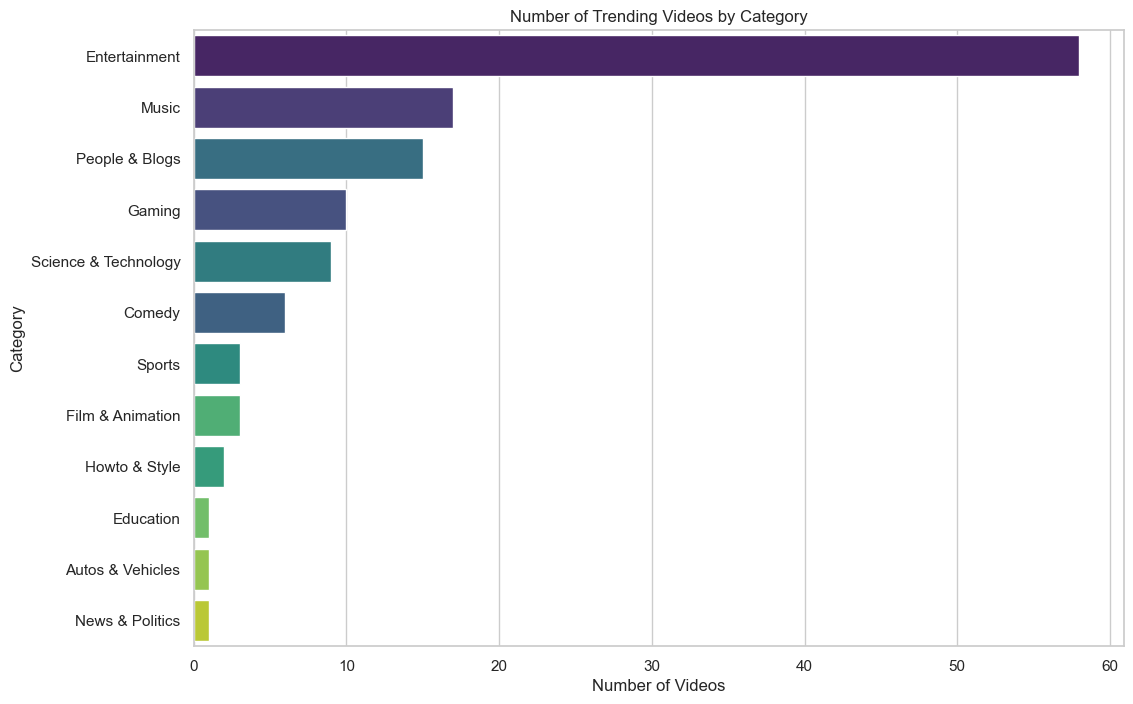

In [27]:
# Now, here’s how we can analyze the number of trending videos by category:

trending_videos['category_name'] = trending_videos['category_id'].map(category_mapping)

# Bar chart for category counts
plt.figure(figsize=(12, 8))
sns.countplot(y=trending_videos['category_name'], order=trending_videos['category_name'].value_counts().index, palette='viridis', hue = trending_videos['category_name'], legend = False)
plt.title('Number of Trending Videos by Category')
plt.xlabel('Number of Videos')
plt.ylabel('Category')
plt.show()

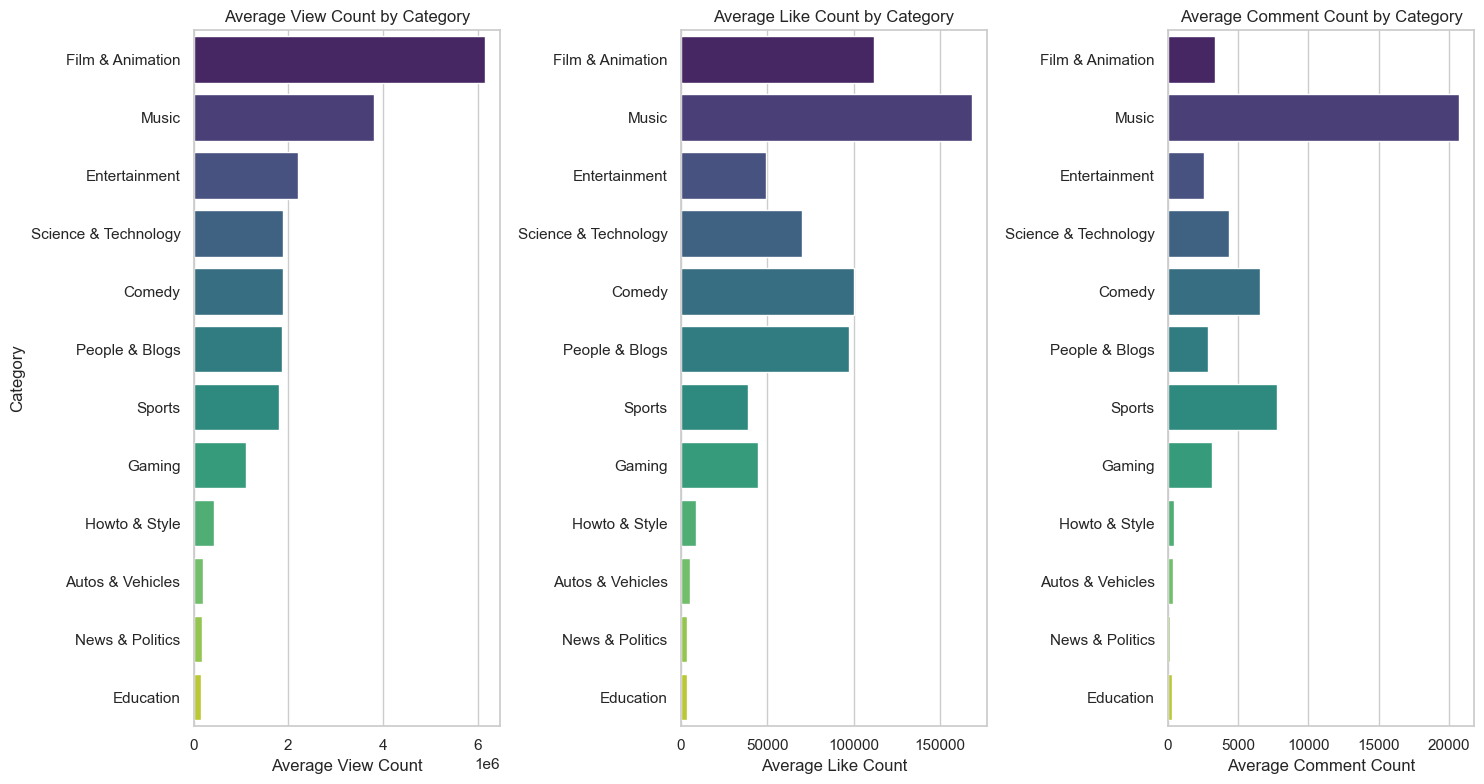

In [28]:
# Now, let’s have a look at the average engagement metrics by category:

# average engagement metrics by category
category_engagement = trending_videos.groupby('category_name')[['view_count', 'like_count', 'comment_count']].mean().sort_values(by='view_count', ascending=False)

fig, axes = plt.subplots(1, 3, figsize=(15, 8))

# view count by category
sns.barplot(y=category_engagement.index, x=category_engagement['view_count'], ax=axes[0], palette='viridis', hue=category_engagement.index, legend = False)
axes[0].set_title('Average View Count by Category')
axes[0].set_xlabel('Average View Count')
axes[0].set_ylabel('Category')

# like count by category
sns.barplot(y=category_engagement.index, x=category_engagement['like_count'], ax=axes[1], palette='viridis', hue=category_engagement.index, legend = False)
axes[1].set_title('Average Like Count by Category')
axes[1].set_xlabel('Average Like Count')
axes[1].set_ylabel('')

# comment count by category
sns.barplot(y=category_engagement.index, x=category_engagement['comment_count'], ax=axes[2], palette='viridis', hue=category_engagement.index, legend = False)
axes[2].set_title('Average Comment Count by Category')
axes[2].set_xlabel('Average Comment Count')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()